In [1]:
from pylab import*
%run "senofac.ipynb"
%matplotlib inline

Se utilizará el método de Euler, porque es bonito. A continuación se definen las correspondientes derivadas a utilizar, derivadas del problema que se ha enunciado en la tarea.

In [12]:
def dfuncion1(x,z,y,t):
    return 10*(z-y)

In [13]:
def ddfuncion1(x,z,y,t):
    return y*(28-x) - z

In [14]:
def dd_funcion1(x,z,y,t):
    return y*z - (8/3)*x

Introducimos estas funciones al integrador Euler diseñado para tres ecuaciones diferenciales acopladas:

In [20]:
def euler(funcion,dfuncion,dd_funcion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2]
    x = [0]*len(tiempos)
    x[0] = p_ini[3]
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + funcion(x[i],z[i],y[i],tiempos[i])*h #para solucion x, donde dfuncion es la derivada de x
        z[i+1] = z[i] + dfuncion(x[i],z[i],y[i],tiempos[i])*h #para la derivada v, y 'funcion' es la derivada de v
        x[i+1] = x[i] + dd_funcion(x[i],z[i],y[i],tiempos[i])*h
    solucion = [tiempos,y,z,x] 
    return solucion

Inciso a)

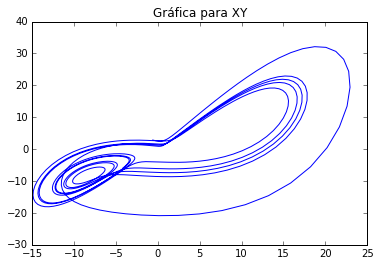

In [32]:
a = rand()*10 - 5
b = rand()*10 - 5
c = rand()*10 - 5
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b,c],10,0.01)
plot(sol[1],sol[2])
plt.title(u'Gráfica para XY' )

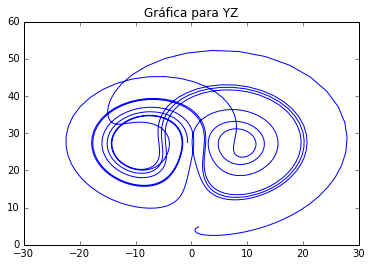

In [35]:
a = rand()*10 - 5
b = rand()*10 - 5
c = rand()*10 - 5
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b,c],10,0.01)
plot(sol[2],sol[3]) #yz
plt.title(u'Gráfica para YZ' )

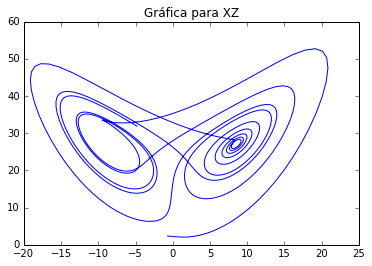

In [37]:
a = rand()*10 - 5
b = rand()*10 - 5
c = rand()*10 - 5
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b,c],10,0.01)
plot(sol[1],sol[3]) #xz
plt.title(u'Gráfica para XZ' )

Inciso b)

Para obtener ahora dos soluciones que no 'difieran' mucho, se tomará un valor random (sea $a$) y a partir de él se tomarán dos valores random entre $a$ y $a + d$ y entre $a$ y $a-d$ donde $d=10^{-2}$

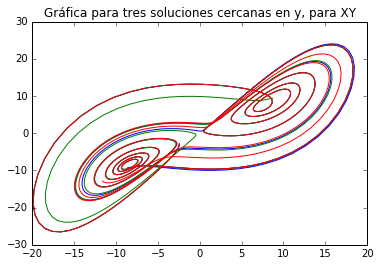

In [45]:
a = rand()*10 - 5
b = rand()*10 - 5
c = rand()*10 - 5
d = rand()*0.01
e = rand()*0.01
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b,c],10,0.01)
sol1 = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b + d,c],10,0.01)
sol2 = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b - e,c],10,0.01)
plot(sol[1],sol[2],sol1[1],sol1[2],sol2[1],sol2[2]) #xy
plt.title(u'Gráfica para tres soluciones cercanas en y, para XY' )

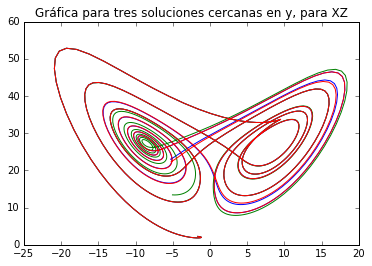

In [46]:
a = rand()*10 - 5
b = rand()*10 - 5
c = rand()*10 - 5
d = rand()*0.01
e = rand()*0.01
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b,c],10,0.01)
sol1 = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b + d,c],10,0.01)
sol2 = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b - e,c],10,0.01)
plot(sol[1],sol[3],sol1[1],sol1[3],sol2[1],sol2[3]) #xz
plt.title(u'Gráfica para tres soluciones cercanas en y, para XZ' )

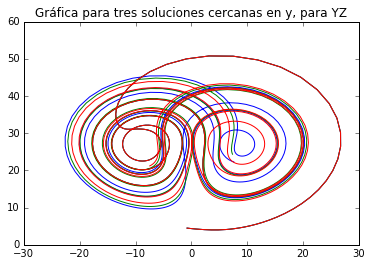

In [47]:
a = rand()*10 - 5
b = rand()*10 - 5
c = rand()*10 - 5
d = rand()*0.01
e = rand()*0.01
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b,c],10,0.01)
sol1 = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b + d,c],10,0.01)
sol2 = euler(dfuncion1,ddfuncion1,dd_funcion1,[0,a,b - e,c],10,0.01)
plot(sol[2],sol[3],sol1[2],sol1[3],sol2[2],sol2[3]) #yz
plt.title(u'Gráfica para tres soluciones cercanas en y, para YZ' )

Se observa que aún para cambios pequeños de las condiciones iniciales en 'y' las soluciones, aunque con forma parecida, resultan ser bastante caóticas en el sentido que un pequeño cambio (tanto como una fracción de 0.02) puede lograr que una solución sea totalmente distinta de la otra, esto se observa al tomar dos soluciones (de color distinto) y seguirlas. Se encontrará que no van 'juntas' ni casi paralelas, al contrario existen puntos en donde se intersectan casi a ángulos de noventa grados. Es por eso que esta solución es bastante sensible a las condiciones iniciales, lo que podría llegar a llamarse caótica.